# XRT Blop Demo

In [9]:
from blop.utils import prepare_re_env  # noqa
%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [ ]:
import sys, os
from matplotlib import pyplot as plt
from blop.sim.xrt_beamline import Beamline

from blop import DOF, Objective, Agent
from blop.digestion import beam_stats_digestion
import time

In [11]:
plt.ion()

h_opt = 0
dh = 5

R1, dR1 = 40000, 10000
R2, dR2 = 20000, 10000

bec.disable_plots()

In [12]:
beamline = Beamline(name="bl")
time.sleep(1)
dofs = [
    DOF(description="KBV R",
        device=beamline.kbv_dsv,
        search_domain=(R1-dR1, R1+dR1)),
    DOF(description="KBH R",
        device=beamline.kbh_dsh,
        search_domain=(R2-dR2, R2+dR2)),

]

beamLine.toroidMirror01.R=38245
beamLine.toroidMirror02.R=21035


In [13]:
objectives = [
    Objective(name="bl_det_sum", 
              target="max",
              transform="log",
              trust_domain=(20, 1e12)),

    Objective(name="bl_det_wid_x",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
    Objective(name="bl_det_wid_y",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
]

In [14]:
agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

In [15]:
RE(agent.learn("qr", n=16))
RE(agent.learn("qei", n=16, iterations=4))


2025-03-04 14:26:33.022 INFO: Executing plan <generator object Agent.learn at 0x394026c00>
2025-03-04 14:26:33.024 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x3619b0f50> from 'idle' -> 'running'
2025-03-04 14:26:33.024 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 14:26:33
Persistent Unique Scan ID: '47fb6123-3680-4d35-8946-aacedf244c20'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 center: [0, 11000, 176.3269570868911]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 45.031ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 14:26:33.1 |  37922.148 |  10767.028 |   -201.126 |      200.520 |      149.041 |      357.940 |       19.073 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]


2025-03-04 14:26:34.459 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x3619b0f50> from 'running' -> 'idle'
2025-03-04 14:26:34.460 INFO: Cleaned up from plan <generator object Agent.learn at 0x394026c00>
2025-03-04 14:26:34.460 INFO: Executing plan <generator object Agent.learn at 0x394027ba0>
2025-03-04 14:26:34.461 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x3619b0f50> from 'idle' -> 'running'
2025-03-04 14:26:34.461 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-03-04 14:26:36
Persistent Unique Scan ID: '9557186b-3308-4933-bfe8-e6a3151721c3'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 34.868ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 14:26:36.6 |  43643.453 |  19822.000 |   7852.453 |      206.819 |      145.496 |       24.005 |       72.267 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.604ms
|         2 | 14:26:36.6 |  3

2025-03-04 14:26:37.982 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-03-04 14:26:39
Persistent Unique Scan ID: 'e008f9ce-6eb2-46a2-a093-a98bfb658f88'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.023ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 14:26:40.0 |  39522.344 |  21367.441 |  22814.824 |      200.387 |      156.789 |       19.645 |       32.312 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 35.182ms
|         2 | 14:26:40.1 |  3

2025-03-04 14:26:41.430 INFO: running iteration 3 / 4
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/



Transient Scan ID: 4     Time: 2025-03-04 14:26:45
Persistent Unique Scan ID: 'a062ed9f-3533-46ed-9713-ac355baaaff0'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 34.618ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 14:26:45.4 |  48547.117 |  20817.836 |   1232.441 |      192.740 |      151.487 |       13.381 |       97.075 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 38.022ms
|         2 | 14:26:45.5 |  4

2025-03-04 14:26:46.837 INFO: running iteration 4 / 4
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(
/opt/homebrew/anaconda3/envs/xrt-blop/lib/python3.11/site-packages/



Transient Scan ID: 5     Time: 2025-03-04 14:26:52
Persistent Unique Scan ID: 'd8a4b40b-e705-4e5b-8c10-6a8aa96547d0'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 38.044ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 14:26:52.6 |  30425.791 |  28019.385 |    674.569 |      195.383 |      163.333 |      224.167 |      131.600 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 38.973ms
|         2 | 14:26:52.7 |  3

2025-03-04 14:26:54.111 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x3619b0f50> from 'running' -> 'idle'
2025-03-04 14:26:54.111 INFO: Cleaned up from plan <generator object Agent.learn at 0x394027ba0>


('9557186b-3308-4933-bfe8-e6a3151721c3',
 'e008f9ce-6eb2-46a2-a093-a98bfb658f88',
 'a062ed9f-3533-46ed-9713-ac355baaaff0',
 'd8a4b40b-e705-4e5b-8c10-6a8aa96547d0')

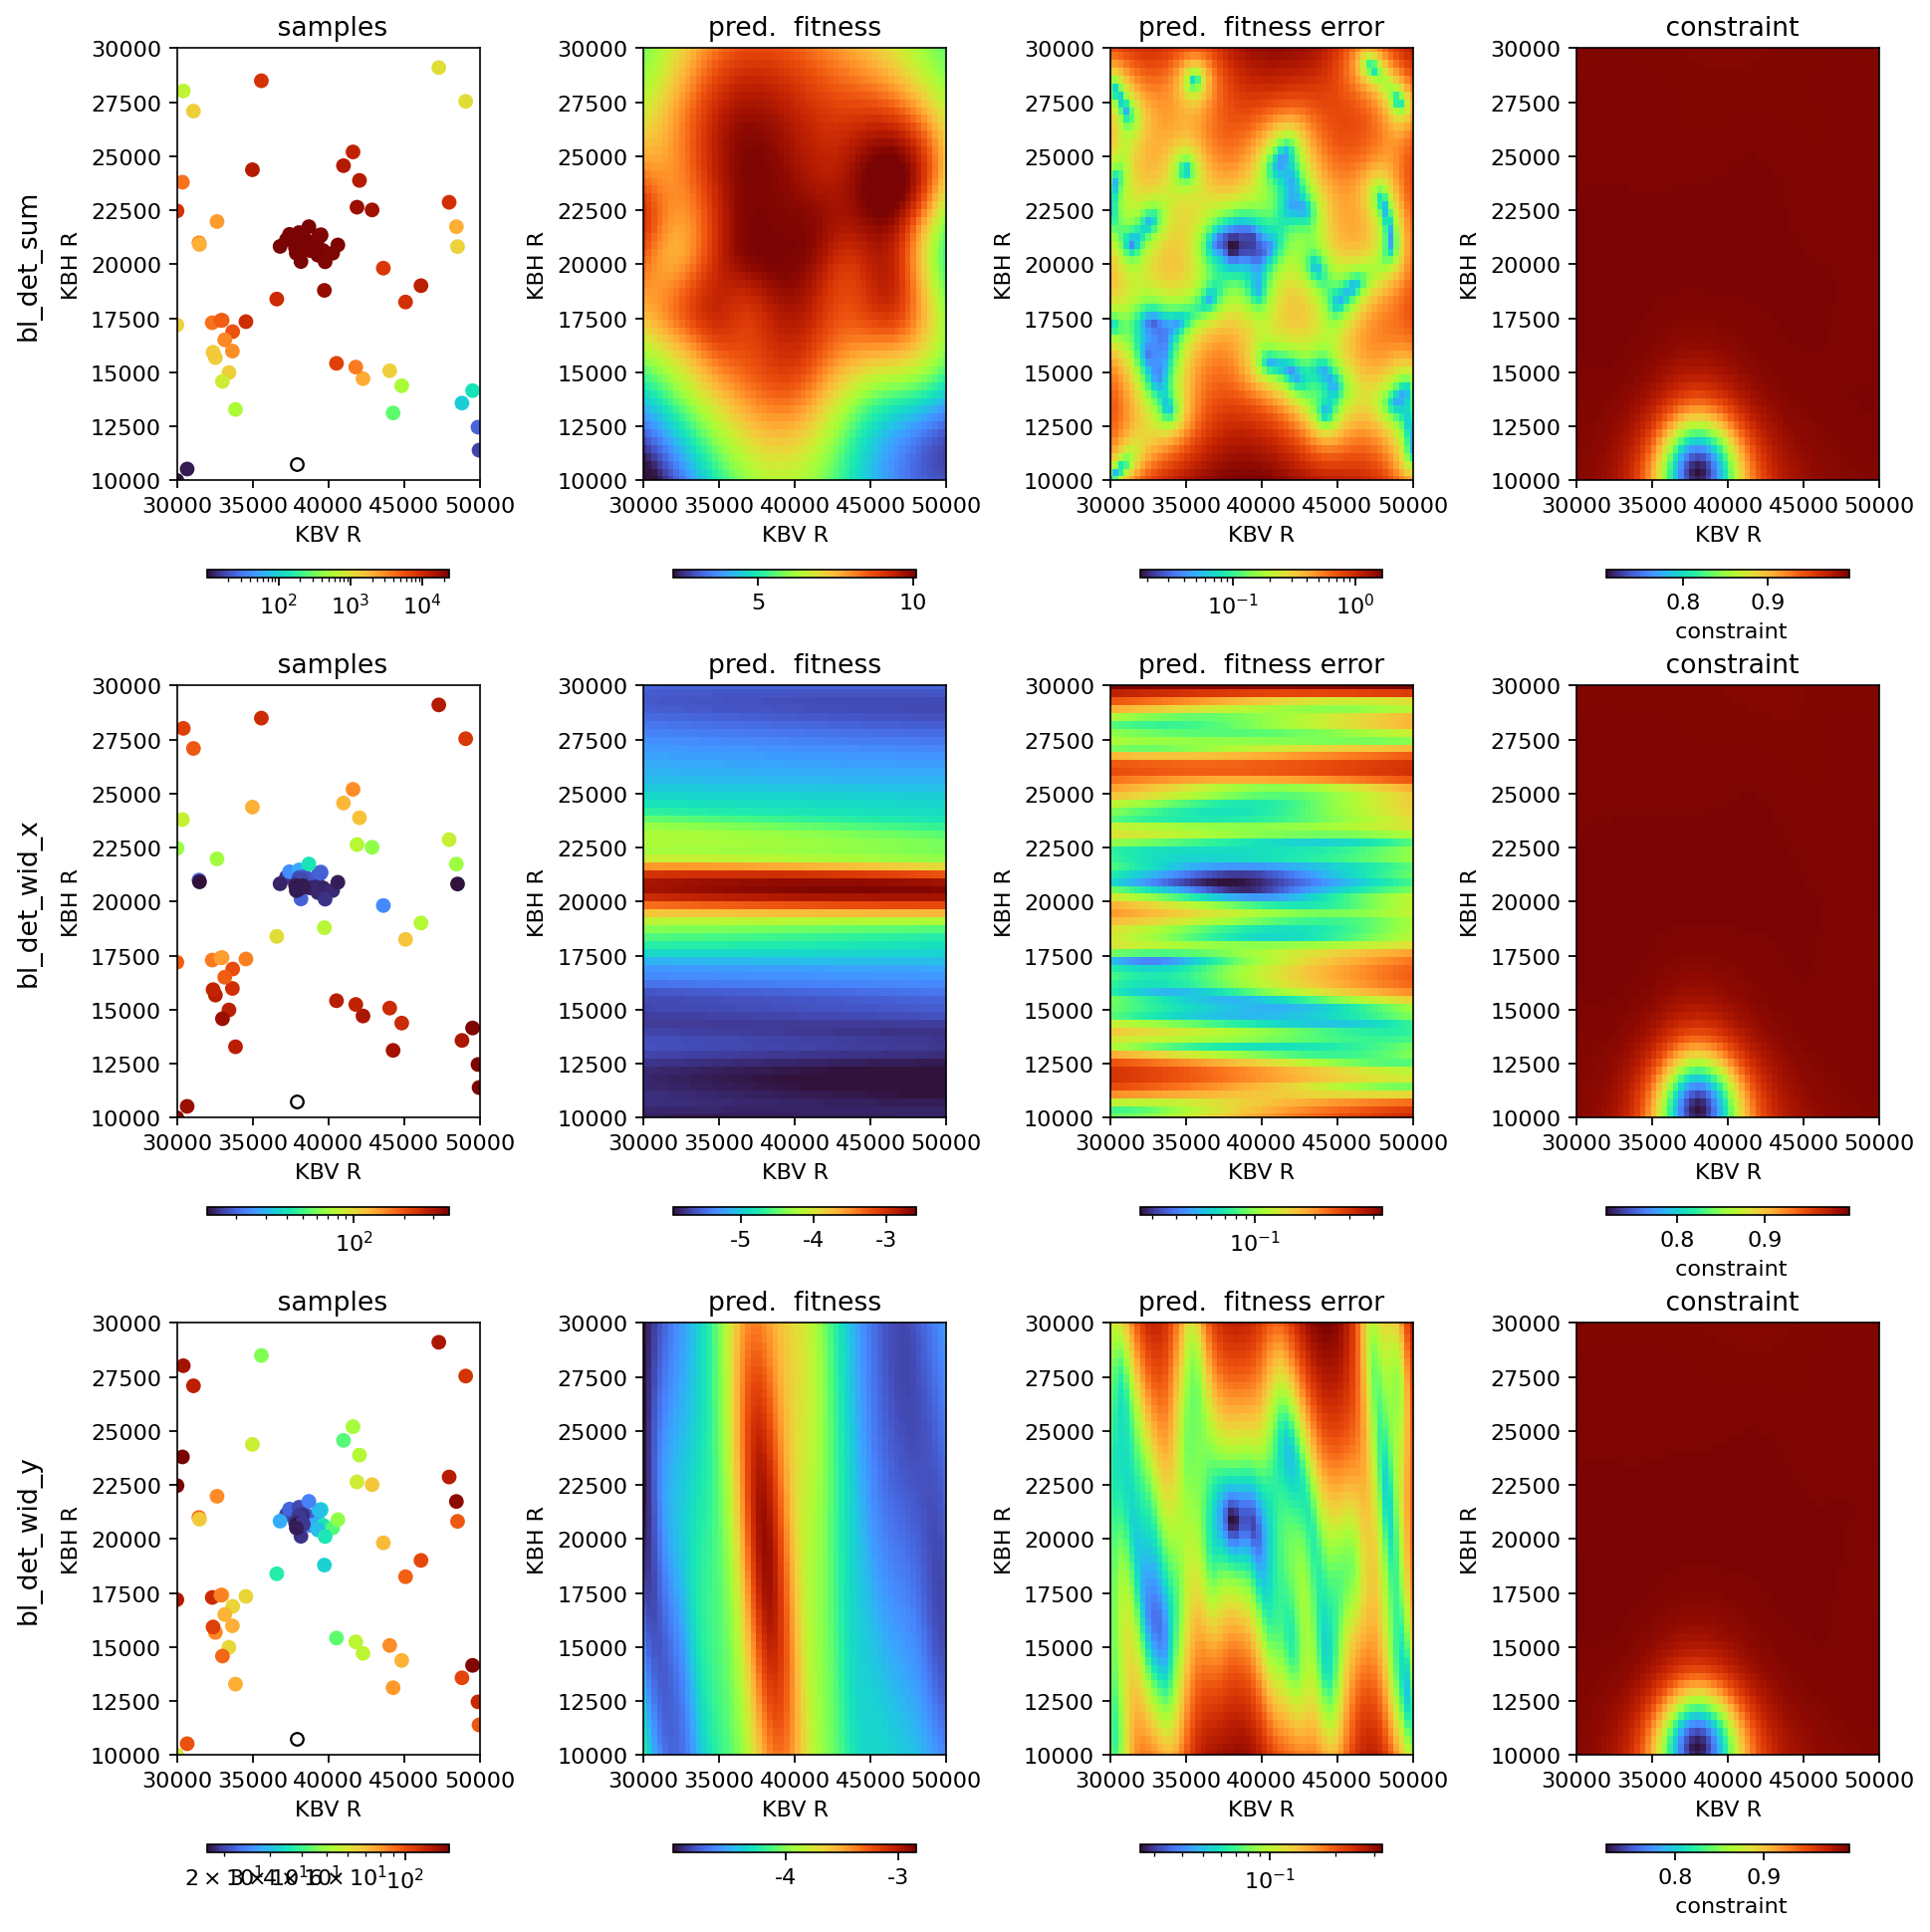

In [16]:
agent.plot_objectives(axes=(0, 1))